In [1]:
import pandas as pd
import numpy as np
import anndata as ad
import scanpy as sc
import scvelo as scv
import latentvelo as ltv

Global seed set to 0


Data downloaded from https://github.com/PourquieLab/Djeffal_Miao_2022

In [2]:
adata24 = sc.read('Miao_Djeffal_2022/data/sample_1_segmentoid_24h_velo_originalmatrix.h5ad')
adata48 = sc.read('Miao_Djeffal_2022/data/sample_1_segmentoid_48h_velo_originalmatrix.h5ad')
adata72 = sc.read('Miao_Djeffal_2022/data/sample_3_segmentoid_72h_velo_originalmatrix.h5ad')
adata98 = sc.read('Miao_Djeffal_2022/data/sample_3_segmentoid_98h_velo_originalmatrix.h5ad')

In [3]:
# same preprocessing as original data

sc.pp.filter_cells(adata24, min_counts=4000)
sc.pp.filter_cells(adata24, max_counts=65000)
sc.pp.filter_cells(adata24, min_genes=3000)
sc.pp.filter_cells(adata24, max_genes=8000)

sc.pp.filter_cells(adata48, min_counts=4000)
sc.pp.filter_cells(adata48, max_counts=65000)
sc.pp.filter_cells(adata48, min_genes=3000)
sc.pp.filter_cells(adata48, max_genes=8000)

sc.pp.filter_cells(adata72, min_counts=4000)
sc.pp.filter_cells(adata72, max_counts=65000)
sc.pp.filter_cells(adata72, min_genes=3000)
sc.pp.filter_cells(adata72, max_genes=8000)

sc.pp.filter_cells(adata98, min_counts=4000)
sc.pp.filter_cells(adata98, max_counts=65000)
sc.pp.filter_cells(adata98, min_genes=3000)
sc.pp.filter_cells(adata98, max_genes=8000)

In [4]:
cell_cycle_genes = [x.strip() for x in open('../../../../../../../media/spencer/Seagate Backup Plus Drive/scRNAseq/somitogenisis/Miao_Djeffal_2022/utils/regev_lab_cell_cycle_genes.txt')]
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata24.var_names]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata48.var_names]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata72.var_names]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata98.var_names]

sc.tl.score_genes_cell_cycle(adata24, s_genes=s_genes, g2m_genes=g2m_genes)
sc.tl.score_genes_cell_cycle(adata48, s_genes=s_genes, g2m_genes=g2m_genes)
sc.tl.score_genes_cell_cycle(adata72, s_genes=s_genes, g2m_genes=g2m_genes)
sc.tl.score_genes_cell_cycle(adata98, s_genes=s_genes, g2m_genes=g2m_genes)

In [5]:
adata24.var["mito"] = adata24.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata24, qc_vars=["mito"], inplace=True)
adata24 = adata24[adata24.obs['pct_counts_mito'] < 10, :]

adata48.var["mito"] = adata48.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata48, qc_vars=["mito"], inplace=True)
adata48 = adata48[adata48.obs['pct_counts_mito'] < 10, :]

adata72.var["mito"] = adata72.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata72, qc_vars=["mito"], inplace=True)
adata72 = adata72[adata72.obs['pct_counts_mito'] < 10, :]

adata98.var["mito"] = adata98.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata98, qc_vars=["mito"], inplace=True)
adata98 = adata98[adata98.obs['pct_counts_mito'] < 10, :]

In [7]:
import anndata as ad

Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:10) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:05) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


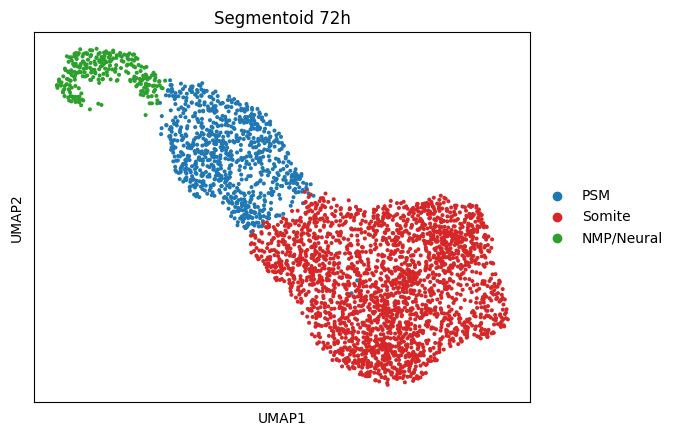

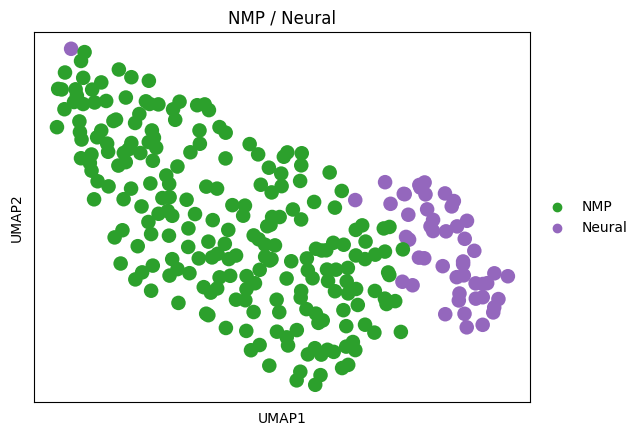

Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:04) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


59563

In [8]:
# connect batches

import gc
adata24.raw = adata24
sc.pp.normalize_total(adata24)
sc.pp.log1p(adata24)
sc.pp.highly_variable_genes(adata24, n_top_genes=1500)
sc.pp.regress_out(adata24, ['S_score', 'G2M_score'], n_jobs = 4)
sc.pp.scale(adata24)
scv.pp.moments(adata24, n_pcs=30, n_neighbors=30)
sc.tl.umap(adata24)
sc.tl.leiden(adata24, resolution=.5, key_added='clusters')
adata24.obs['clusters'] = adata24.obs['clusters'].replace(['0'],'NMP')
adata24.obs['clusters'] = adata24.obs['clusters'].replace(['1'],'NMP')
adata24.obs['clusters'] = adata24.obs['clusters'].replace(['2'],'NMP')
adata24.obs['clusters'] = adata24.obs['clusters'].replace(['3'],'PSM')

gc.collect()

adata48.raw = adata48
sc.pp.normalize_total(adata48)
sc.pp.log1p(adata48)
sc.pp.highly_variable_genes(adata48, n_top_genes=1500)
sc.pp.regress_out(adata48, ['S_score', 'G2M_score'], n_jobs = 4)
sc.pp.scale(adata48)
scv.pp.moments(adata48, n_pcs=30, n_neighbors=30)
sc.tl.umap(adata48)
sc.tl.leiden(adata48, resolution=.3, key_added='clusters')
adata48.obs['clusters'] = adata48.obs['clusters'].replace(['0'],'PSM')
adata48.obs['clusters'] = adata48.obs['clusters'].replace(['1'],'PSM')
adata48.obs['clusters'] = adata48.obs['clusters'].replace(['2'],'NMP')

gc.collect()

adata72.raw = adata72
sc.pp.normalize_total(adata72)
sc.pp.log1p(adata72)
sc.pp.highly_variable_genes(adata72, n_top_genes=1750)
sc.pp.regress_out(adata72, ['S_score', 'G2M_score'], n_jobs = 4)
sc.pp.scale(adata72)
scv.pp.moments(adata72, n_pcs=30, n_neighbors=30)
sc.tl.umap(adata72)
sc.tl.leiden(adata72, resolution=.4, key_added='clusters')
adata72.obs['clusters'] = adata72.obs['clusters'].replace(['0'],'PSM')
adata72.obs['clusters'] = adata72.obs['clusters'].replace(['1'],'Somite')
adata72.obs['clusters'] = adata72.obs['clusters'].replace(['2'],'Somite')
adata72.obs['clusters'] = adata72.obs['clusters'].replace(['3'],'Somite')
adata72.obs['clusters'] = adata72.obs['clusters'].replace(['4'],'Somite')
adata72.obs['clusters'] = adata72.obs['clusters'].replace(['5'],'NMP/Neural')
sc.pl.umap(adata72, color=['clusters'], title='Segmentoid 72h', palette=['tab:blue', 'tab:red', 'tab:green'])

gc.collect()

tmp = adata72[adata72.obs['clusters'].isin(['NMP/Neural']),:]
adata_sc = sc.AnnData(tmp.raw.X,obs=tmp.obs,var=tmp.raw.var,uns=tmp.uns,obsm=tmp.obsm,obsp=tmp.obsp,layers=tmp.layers)
adata_sc.raw = adata_sc
sc.tl.umap(adata_sc)
sc.tl.leiden(adata_sc, resolution=.5, key_added='leiden_sc')
adata_sc.obs['leiden_sc'] = adata_sc.obs['leiden_sc'].replace(['0'],'NMP')
adata_sc.obs['leiden_sc'] = adata_sc.obs['leiden_sc'].replace(['1'],'NMP')
adata_sc.obs['leiden_sc'] = adata_sc.obs['leiden_sc'].replace(['2'],'NMP')
adata_sc.obs['leiden_sc'] = adata_sc.obs['leiden_sc'].replace(['3'],'Neural')
sc.pl.umap(adata_sc, color=['leiden_sc'], title='NMP / Neural', palette=['tab:green', 'tab:purple'])
obs = adata_sc.obs_names.to_list()
tmp=adata72[~adata72.obs_names.isin(obs),:]
adata_bis = sc.AnnData(tmp.raw.X,obs=tmp.obs,var=tmp.raw.var,layers=tmp.layers)
tmp_2=adata_sc
adata_sc2 = sc.AnnData(tmp_2.raw.X,obs=tmp_2.obs,var=tmp_2.raw.var,layers=tmp_2.layers)
adata_sc2.obs['clusters']=adata_sc2.obs['leiden_sc']
adata72 = ad.concat([adata_sc2, adata_bis], merge="same")#
#adata_sc2.concatenate(adata_bis, batch_key='batch_layer_2')

del tmp
del tmp_2
del adata_sc
gc.collect()

adata98.raw = adata98
sc.pp.normalize_total(adata98)
sc.pp.log1p(adata98)
sc.pp.highly_variable_genes(adata98, n_top_genes=1750)
sc.pp.regress_out(adata98, ['S_score', 'G2M_score'], n_jobs = 4)
sc.pp.scale(adata98)
scv.pp.moments(adata98, n_pcs=30, n_neighbors=30)
sc.tl.umap(adata98)
sc.tl.leiden(adata98, resolution=.5, key_added='clusters')
adata98.obs['clusters'] = adata98.obs['clusters'].replace(['0'],'Somite')
adata98.obs['clusters'] = adata98.obs['clusters'].replace(['1'],'Somite')
adata98.obs['clusters'] = adata98.obs['clusters'].replace(['2'],'Somite')
adata98.obs['clusters'] = adata98.obs['clusters'].replace(['3'],'Somite')
adata98.obs['clusters'] = adata98.obs['clusters'].replace(['4'],'NMP/Neural')
adata98.obs['clusters'] = adata98.obs['clusters'].replace(['5'],'PSM')
adata98.obs['clusters'] = adata98.obs['clusters'].replace(['6'],'Somite')

tmp = adata98[adata98.obs['clusters'].isin(['NMP/Neural']),:]
adata_sc = sc.AnnData(tmp.raw.X,obs=tmp.obs,var=tmp.raw.var,uns=tmp.uns,obsm=tmp.obsm,obsp=tmp.obsp,layers=tmp.layers)
adata_sc.raw = adata_sc
sc.tl.umap(adata_sc)
sc.tl.leiden(adata_sc, resolution=.3, key_added='leiden_sc')
adata_sc.obs['leiden_sc'] = adata_sc.obs['leiden_sc'].replace(['0'],'NMP')
adata_sc.obs['leiden_sc'] = adata_sc.obs['leiden_sc'].replace(['1'],'Neural')


obs = adata_sc.obs_names.to_list()
tmp=adata98[~adata98.obs_names.isin(obs),:]
adata_bis = sc.AnnData(tmp.raw.X,obs=tmp.obs,var=tmp.raw.var,layers=tmp.layers)
tmp_2=adata_sc
adata_sc2 = sc.AnnData(tmp_2.raw.X,obs=tmp_2.obs,var=tmp_2.raw.var,layers=tmp_2.layers)
adata_sc2.obs['clusters']=adata_sc2.obs['leiden_sc']
#adata98 = adata_sc2.concatenate(adata_bis, batch_key='batch_layer_2')
adata98 = ad.concat([adata_sc2, adata_bis], merge="same")#

del tmp
del tmp_2
del adata_sc
gc.collect()

In [11]:
adata24.obs['timepoint'] = 24
adata48.obs['timepoint'] = 48
adata72.obs['timepoint'] = 72
adata98.obs['timepoint'] = 98

In [12]:
del adata24.layers['ambiguous']
del adata48.layers['ambiguous']
del adata72.layers['ambiguous']
del adata98.layers['ambiguous']

del adata24.layers['matrix']
del adata48.layers['matrix']
del adata72.layers['matrix']
del adata98.layers['matrix']

In [13]:
del adata24.obsp
del adata48.obsp
del adata72.obsp
del adata98.obsp

In [14]:
del adata24.layers['Ms']
del adata48.layers['Ms']
del adata72.layers['Ms']
del adata98.layers['Ms']

del adata24.layers['Mu']
del adata48.layers['Mu']
del adata72.layers['Mu']
del adata98.layers['Mu']

In [15]:
gc.collect()

0

In [17]:
adata = ad.concat([adata24, adata48, adata72, adata98], merge="same")

In [19]:
del adata24
del adata48
del adata72
del adata98

In [20]:
gc.collect()

425

In [21]:
adata

AnnData object with n_obs × n_vars = 9370 × 36601
    obs: 'n_counts', 'n_genes', 'S_score', 'G2M_score', 'phase', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'clusters', 'timepoint'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'mito'
    layers: 'spliced', 'unspliced'

In [22]:
adata.write('data/preprocessed_clusters.h5ad')

In [23]:
adata.obs['clusters'].to_csv('data/cluster_names.csv')